<a href="https://colab.research.google.com/github/SophiaLista/Data-Scientist/blob/main/tp_spotify_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 TP Data Science




---



# ❓ Problema a Resolver

Determinar qué canciones convienen promocionar para lograr un alto impacto de mercado y obtener el mayor retorno de la inversión (ROI) en términos de exposición e inversión.

Nuestra Solución:
Abordaremos el desafío de predecir la popularidad de una canción basándonos en sus características musicales. Construiremos un modelo de clasificación utilizando técnicas de machine learning y evaluaremos su desempeño utilizando métricas como precisión, recall y F1-score.

Nuestra solución proporcionará a Spotify (o la industria) información valiosa permitiendo una toma de decisiones basada en datos para el lanzamiento y promoción de canciones.



---



# ⚙️ Seteamos el espacio de trabajo

### 1️⃣  Conector a Google Drive



Para facilitar la colaboración utilizaremos Google Drive para alojar los archivos que vamos a trabajar.

Es importante que cada uno tenga una copia de los archivos CSV en la siguiente carpeta de nuestros respectivos drives.

Esto asegurará que todos tengamos acceso a los mismos datos y podamos trabajar de manera sincronizada en el proyecto.

`'/content/drive/MyDrive/Colab Notebooks/_up_spotify/'`

In [1]:
from google.colab import drive # conector con google drive, tenemos que autenticarnos
drive.mount('/content/drive')

Mounted at /content/drive


### 2️⃣  Librerias que vamos a usar en el trabajo

In [2]:
import pandas as pd #Para manipular y analizar datos de manera eficiente.
import seaborn as sns #Para crear visualizaciones estadísticas atractivas y informativas.
import numpy as np #Para operaciones numéricas y cálculos matemáticos eficientes.
import matplotlib.pyplot as plt #Para operaciones numéricas y cálculos matemáticos eficientes.
# CONSTANTES
SEED = 26




---



# ✅ Checkpoint 1 - EDA (Análisis Exploratorio de Datos)


El primer paso de nuestro trabajo implica realizar un análisis exploratorio de los datos para comprender mejor las distribuciones, las relaciones entre las variables y la presencia de posibles valores atípicos o datos faltantes.

Luego, puedes dividir los datos en un conjunto de entrenamiento y un conjunto de prueba, y aplicar técnicas de preprocesamiento, como la normalización de las características numéricas y la codificación de las características categóricas si las hubiera.



---



## Preparamos los datos

### 1️⃣ Revisamos que todos los CVS de origen tengan el mismo formato

In [ ]:
df_2010s = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/_up_spotify/dataset-of-10s.csv", sep=",") # creamos el primer dataset a partir del CVS
df_2010s.dtypes #verificamos el contenido del datafile


track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

In [ ]:
# creamos el resto de los dataset
df_2000s = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/_up_spotify/dataset-of-00s.csv", sep=",")
df_1990s = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/_up_spotify/dataset-of-90s.csv", sep=",")
df_1980s = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/_up_spotify/dataset-of-80s.csv", sep=",")
df_1970s = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/_up_spotify/dataset-of-70s.csv", sep=",")
df_1960s = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/_up_spotify/dataset-of-60s.csv", sep=",")


In [ ]:
# revisamos si todos los dataset de las distintas decadas tienen el mismo formato

decades=[df_2000s,df_1990s,df_1980s,df_1970s,df_1960s,df_2010s]
for decade in decades:
  print(decade.dtypes.equals(df_2010s.dtypes))


True
True
True
True
True
True


### 2️⃣ Categorizamos los datasets y los unificamos en uno solo

In [ ]:
# agregamos una columna 'decade' para categorizar y representar la década correspondiente en cada dataset

df_2010s["decade"] = "2010s"
df_2000s["decade"] = "2000s"
df_1990s["decade"] = "1990s"
df_1980s["decade"] = "1980s"
df_1970s["decade"] = "1970s"
df_1960s["decade"] = "1960s"


In [ ]:
# consolidamos los archivos

songs = pd.concat([df_1960s, df_1970s, df_1980s, df_1990s, df_2000s, df_2010s]) # creamos el DataFrame concatenando los datasets de las decadas
songs['decade'] = pd.Categorical(songs["decade"], categories = ["1960s", "1970s", "1980s", "1990s", "2000s", "2010s"], ordered = True) # transformamos 'decade' en categorico


In [ ]:
# vemos las 10 primeras filas del DataFrame
songs.head(10)


track                artist  \
0                  Jealous Kind Of Fella         Garland Green   
1                          Initials B.B.      Serge Gainsbourg   
2                           Melody Twist           Lord Melody   
3                          Mi Bomba Sonó            Celia Cruz   
4                            Uravu Solla           P. Susheela   
5                              Beat n. 3       Ennio Morricone   
6  Samba De Uma Nota So (One Note Samba)  Antônio Carlos Jobim   
7                             Happy Days          Marv Johnson   
8             Carolina - Remastered 2006        Caetano Veloso   
9                       I Can Hear Music        The Beach Boys   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417   0.620    3    -7.727   
1  spotify:track:5hjsmSnUefdUqzsDogisiX         0.498   0.505    3   -12.475   
2  spotify:track:6uk8tI6pwxxdVTNlNOJeJh         0.657   0.649    5   -13.392   
3  spotify:track:7aNjMJ05FvUXACPWZ7yJmv         0.590   0.545    7   -12.058   
4  spotify:track:1rQ0clvgkzWr001POOPJWx         0.515   0.765   11    -3.515   
5  spotify:track:32VBSoD2vcoIOiPEvAfFXU         0.697   0.673    0   -10.573   
6  spotify:track:62eoocmGk59EMfuRcLBvUL         0.662   0.272    0   -18.883   
7  spotify:track:0ecGwZA1ReAq4Mn3ZInaT4         0.720   0.624    5    -9.086   
8  spotify:track:15gNqKkZN9Mq9AvnRqWJKb         0.545   0.220    2   -15.079   
9  spotify:track:1hcMfYTsRTC4hIKbfosxjz         0.511   0.603    2    -7.637   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0403        0.4900          0.000000    0.0779    0.845   
1     1       0.0337        0.0180          0.107000    0.1760    0.797   
2     1       0.0380        0.8460          0.000004    0.1190    0.908   
3     0       0.1040        0.7060          0.024600    0.0610    0.967   
4     0       0.1240        0.8570          0.000872    0.2130    0.906   
5     1       0.0266        0.7140          0.919000    0.1220    0.778   
6     1       0.0313        0.3600          0.228000    0.0963    0.591   
7     0       0.0473        0.7950          0.000000    0.4880    0.887   
8     0       0.0828        0.5820          0.239000    0.2690    0.386   
9     1       0.0280        0.0385          0.000002    0.1420    0.685   

     tempo  duration_ms  time_signature  chorus_hit  sections  target decade  
0  185.655       173533               3    32.94975         9       1  1960s  
1  101.801       213613               4    48.82510        10       0  1960s  
2  115.940       223960               4    37.22663        12       0  1960s  
3  105.592       157907               4    24.75484         8       0  1960s  
4  114.617       245600               4    21.79874        14       0  1960s  
5  112.117       167667               4    65.48604         7       0  1960s  
6  143.507       134360               4    47.82155         7       0  1960s  
7  119.999       160040               4    30.42891         8       1  1960s  
8  118.223       158413               4    47.08099         6       0  1960s  
9  128.336       157293               4    43.36534         9       1  1960s

In [ ]:
# mezcla aleatoria y restablecimiento del índice

songs = songs.sample(frac = 1, random_state = SEED) # mezclamos el DataFrame
songs = songs.reset_index(drop = True) # restablecemos el indice del DataFrame en base al nuevo orden y eliminamos el original
songs.head(15) # vemos las 15 primeras filas del DataFrame

track                artist  \
0                      I Could Have Loved You So Well          Ray Peterson   
1                         I'm Never Gonna Say Goodbye         Billy Preston   
2               One Note Samba (Samba de Uma Nota So)  Antônio Carlos Jobim   
3                                        She's A Fool           Lesley Gore   
4                                         Shaker Song            Spyro Gyra   
5   Rigoletto [Act I]: Che m'ami, deh! ripetimi! (...        Giuseppe Verdi   
6                                      I Feel Alright            The Damned   
7                             Let's Make Love Tonight          Bobby Rydell   
8                                            Division          Louise Bogan   
9                                        Malagan Stew        Michel Legrand   
10                                       Samba Triste             Stan Getz   
11                              I've Never Been To Me              Charlene   
12                        I Will Say Goodbye - Take 2       Bill Evans Trio   
13                                Rama Lama Ding Dong            The Edsels   
14  Lonesome And A Long Way From Home - Live At Th...     New Grass Revival   

                                     uri  danceability  energy  key  loudness  \
0   spotify:track:0Xu0V7K1rK7ea4gMmiFIlG         0.265  0.5580   11    -5.394   
1   spotify:track:6BDWITl9HpvfD0Kacsmcu3         0.348  0.3760    2   -10.072   
2   spotify:track:0hVhEVR9C53DSSwfAhwWKJ         0.652  0.3720    7   -15.323   
3   spotify:track:3h681qZSmhBOciAXLl1nsA         0.541  0.3460    3   -12.348   
4   spotify:track:6DX1rny2WXGTifJbC1f7mU         0.707  0.8730    5    -8.546   
5   spotify:track:4UFYVjYhWQPwn9nXph4cuj         0.478  0.3180    1   -12.883   
6   spotify:track:6ewnjrJ5p8fngfpmKULtha         0.306  0.9250    4    -8.835   
7   spotify:track:2bnCTu0tOeQCUMGudRe56R         0.624  0.6040    6    -5.576   
8   spotify:track:2Elq8KQ4AWBK4aCSoMkre5         0.619  0.1320    5   -21.725   
9   spotify:track:0ljWc0OsAhtn0bO5l3pxJI         0.337  0.4030    8   -11.647   
10  spotify:track:0XzaH5uMhwPRIwC62ffgdl         0.641  0.2320    9   -20.560   
11  spotify:track:7Kpv6QtVDSNBJYTgwUTOAu         0.634  0.4480   10    -8.468   
12  spotify:track:4S2SYqP20LHiOKNT1Frof1         0.401  0.0839    5   -22.303   
13  spotify:track:3MfO2eMTwf5LLyMqjwGXLl         0.609  0.7090    1    -7.056   
14  spotify:track:4k3IMyTWZtqqDzVUxex0MP         0.493  0.5980    7    -9.101   

    mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0      1       0.0634      0.690000          0.000008    0.0990   0.5970   
1      1       0.0271      0.599000          0.000000    0.1070   0.2080   
2      1       0.0748      0.696000          0.000001    0.2260   0.7730   
3      1       0.0308      0.822000          0.000000    0.3110   0.6170   
4      1       0.0667      0.355000          0.897000    0.1510   0.7720   
5      1       0.0636      0.930000          0.000037    0.0982   0.4750   
6      0       0.0653      0.000002          0.587000    0.3220   0.6000   
7      1       0.0287      0.604000          0.000003    0.2770   0.7650   
8      0       0.9110      0.864000          0.000000    0.1140   0.4160   
9      1       0.0349      0.161000          0.150000    0.2980   0.7810   
10     0       0.0522      0.823000          0.030700    0.1250   0.6910   
11     1       0.0304      0.798000          0.000001    0.2260   0.3670   
12     0       0.0403      0.987000          0.900000    0.1080   0.0989   
13     1       0.0321      0.254000          0.000010    0.1060   0.9490   
14     1       0.0289      0.569000          0.000127    0.7020   0.8310   

      tempo  duration_ms  time_signature  chorus_hit  sections  target decade  
0   180.792       125800               4    27.32303         8       1  1960s  
1   141.770       221827               4    48.18134        11       1  1980s  
2   139.680       140400     



---



### 3️⃣  Convertir la duración de las canciones de milisegundos a segundos.

Convertimos la duración de las canciones de milisegundos a segundos y lo verificaremos imprimiendo los encabezados del conjunto de datos para comprobar si la duración se convirtió a segundos.

In [ ]:
songs['duration']= songs['duration_ms'].apply(lambda x: round(x/1000)) # Creamos la col 'duration' y le asignamos la duracion en segundos
songs.drop('duration_ms',inplace=True, axis=1) # Eliminar la columna 'duration_ms' del DataFrame 'songs'

In [ ]:
songs.duration.head() # Mostrar las primeras filas de la columna 'duration' para verificar la conversión


0    126
1    222
2    140
3    127
4    287
Name: duration, dtype: int64

In [ ]:
# volvemos a mezclar aleatoriamente y restablecimiento del índice

songs = songs.sample(frac = 1, random_state = SEED) # mezclamos el DataFrame
songs = songs.reset_index(drop = True) # restablecemos el indice del DataFrame en base al nuevo orden y eliminamos el original

songs.head(10) # vemos las 10 primeras filas completas del DataFrame

track                      artist  \
0               I Want Someone                The Mad Lads   
1                  Magic Stick  Lil' Kim Featuring 50 Cent   
2      Stick To The Status Quo    High School Musical Cast   
3              On The Way Down                Ryan Cabrera   
4             Greenback Dollar           The Kingston Trio   
5  Lovin', Touchin', Squeezin'                     Journey   
6          Indian Ink Painting                      A Doom   
7                Get Some More                   Funk Inc.   
8      Turn On Your Love Light            Oscar Toney, Jr.   
9                       Sunken                       Sarke   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:6tbtWo4wBZnKMbsfA2VXop         0.557   0.300    8    -9.335   
1  spotify:track:0aULRU35N9kTj6O1xMULRR         0.849   0.499    2    -7.872   
2  spotify:track:5aNagthlHAudbDZozQMjYP         0.705   0.721    4    -7.083   
3  spotify:track:1GwVi2ceNb8dMFA3DZGnnY         0.500   0.845    1    -5.015   
4  spotify:track:0iSDA5x3Szznzb7JkM4dZN         0.700   0.322    7   -14.241   
5  spotify:track:0VQ0n5gMgJLNixG8BfWBT5         0.401   0.644    2    -8.608   
6  spotify:track:7znjI6OyqWL2lwaVBCpShj         0.525   0.904   11    -4.549   
7  spotify:track:6ZEOlVA2ei1JGEn2D4TejO         0.798   0.601    0    -9.386   
8  spotify:track:7iW55JzmXwD28wNtTLSwb6         0.557   0.811    0    -5.427   
9  spotify:track:1RsuZeA4NgTZDHxymQiJq8         0.209   0.977    0    -4.055   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0289      0.879000          0.000362    0.0883    0.350   
1     1       0.2710      0.117000          0.000050    0.2680    0.504   
2     1       0.1900      0.031600          0.000000    0.2480    0.819   
3     1       0.0369      0.001840          0.000000    0.1060    0.539   
4     1       0.0774      0.864000          0.000000    0.1230    0.847   
5     1       0.0439      0.099200          0.000179    0.2310    0.714   
6     0       0.0441      0.016800          0.044300    0.3300    0.149   
7     0       0.0394      0.559000          0.892000    0.0701    0.869   
8     1       0.0663      0.190000          0.030300    0.1720    0.798   
9     1       0.0986      0.000016          0.074500    0.4040    0.247   

     tempo  time_signature  chorus_hit  sections  target decade  duration  
0  138.700               4    25.72841         9       1  1960s       162  
1   92.982               4    54.34697        13       1  2000s       360  
2  159.980               4    27.86031        16       1  2000s       268  
3   95.199               4    31.32422        11       1  2000s       212  
4  143.505               4    24.26378        10       1  1960s       172  
5  211.261               3    20.28571        13       1  1970s       231  
6  130.011               4    45.71048         9       0  2000s       418  
7  116.064               4    50.50837        13       0  1990s       359  
8   78.888               4    42.78074         6       1  1960s       145  
9   85.633               4    25.54618        12       0  2010s       231

## Analizamos los datos

### 0️⃣   Analisis Descriptivo

In [ ]:
songs.describe().transpose()

count        mean         std        min         25%  \
danceability      41106.0    0.539695    0.177821   0.000000    0.420000   
energy            41106.0    0.579545    0.252628   0.000251    0.396000   
key               41106.0    5.213594    3.534977   0.000000    2.000000   
loudness          41106.0  -10.221525    5.311626 -49.253000  -12.816000   
mode              41106.0    0.693354    0.461107   0.000000    0.000000   
speechiness       41106.0    0.072960    0.086112   0.000000    0.033700   
acousticness      41106.0    0.364197    0.338913   0.000000    0.039400   
instrumentalness  41106.0    0.154416    0.303530   0.000000    0.000000   
liveness          41106.0    0.201535    0.172959   0.013000    0.094000   
valence           41106.0    0.542440    0.267329   0.000000    0.330000   
tempo             41106.0  119.338249   29.098845   0.000000   97.397000   
time_signature    41106.0    3.893689    0.423073   0.000000    4.000000   
chorus_hit        41106.0   40.106041   19.005515   0.000000   27.599792   
sections          41106.0   10.475673    4.871850   0.000000    8.000000   
target            41106.0    0.500000    0.500006   0.000000    0.000000   
duration          41106.0  234.875712  118.964611  15.000000  173.000000   

                         50%         75%       max  
danceability        0.552000    0.669000     0.988  
energy              0.601000    0.787000     1.000  
key                 5.000000    8.000000    11.000  
loudness           -9.257000   -6.374250     3.744  
mode                1.000000    1.000000     1.000  
speechiness         0.043400    0.069800     0.960  
acousticness        0.258000    0.676000     0.996  
instrumentalness    0.000120    0.061250     1.000  
liveness            0.132000    0.261000     0.999  
valence             0.558000    0.768000     0.996  
tempo             117.565000  136.494000   241.423  
time_signature      4.000000    4.000000     5.000  
chorus_hit         35.850795   47.625615   433.182  
sections           10.000000   12.000000   169.000  
target              0.500000    1.000000     1.000  
duration          218.000000  267.000000  4170.000



---



### 1️⃣ Validación de las medidas de tendencia central en el conjunto de datos

Hacer una validación de medidas de tendencia central implica verificar y evaluar la consistencia y precisión de las medidas de tendencia central en un conjunto de datos.

Las medidas de tendencia central, como la media, la mediana y la moda, son estadísticas utilizadas para resumir y representar la ubicación central de un conjunto de datos. La validación de estas medidas implica verificar si están proporcionando una representación precisa y confiable de la ubicación central de los datos.

Antes de empezar a analizar, validaremos que la muestra sea un conjunto de datos homogéneo. Para esto vamos a utilizar el coeficiente de variacion y usaremos como regla que si supera el 20% entonces la media no es representativa de la muestra, en estos casos usaremos la mediana.


In [ ]:
# calculo de los coeficientes de variación (CV) para las columnas numéricas

no_numeric = ['target', 'decade', 'track', 'artist', 'uri', 'mode']  # definimos las columnas no numericas a excluir del analisis

# creamos un DataSet con los coeficientes de variación
cv = songs[songs.columns.difference(no_numeric)].apply(lambda col: abs((col.std() / col.mean()) * 100))
print(cv)

acousticness         93.057479
chorus_hit           47.388160
danceability         32.948383
duration             50.650027
energy               43.590815
instrumentalness    196.566341
key                  67.803072
liveness             85.821121
loudness             51.965100
sections             46.506326
speechiness         118.025124
tempo                24.383503
time_signature       10.865613
valence              49.282641
dtype: float64


In [ ]:
# Identificamos coeficientes de variación <= 20

cv.apply(lambda cv: cv <= 20)

acousticness        False
chorus_hit          False
danceability        False
duration            False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
sections            False
speechiness         False
tempo               False
time_signature       True
valence             False
dtype: bool

Según la condición propuesta, la única columna que cumple con dicha condición es **time_signature**. Por lo tanto, se evitará basar las conclusiones en medidas de tendencia central y, en su lugar, se utilizará la mediana en las columnas que no sean **time_signature** cuando sea absolutamente necesario utilizar una medida de tendencia central. Como especialista en data science, es importante considerar la idoneidad de las medidas utilizadas en función de las características específicas de cada columna.



---



### 2️⃣ Exploración de correlaciones entre variables en el dataset

Generamos una matriz de correlación para comprender las relaciones entre variables y tomar decisiones informadas basadas en la fuerza y dirección de las correlaciones.

<ipython-input-21-e4c168a899bb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = round(songs.corr(), 2) # Crear la matriz de correlación redondeada


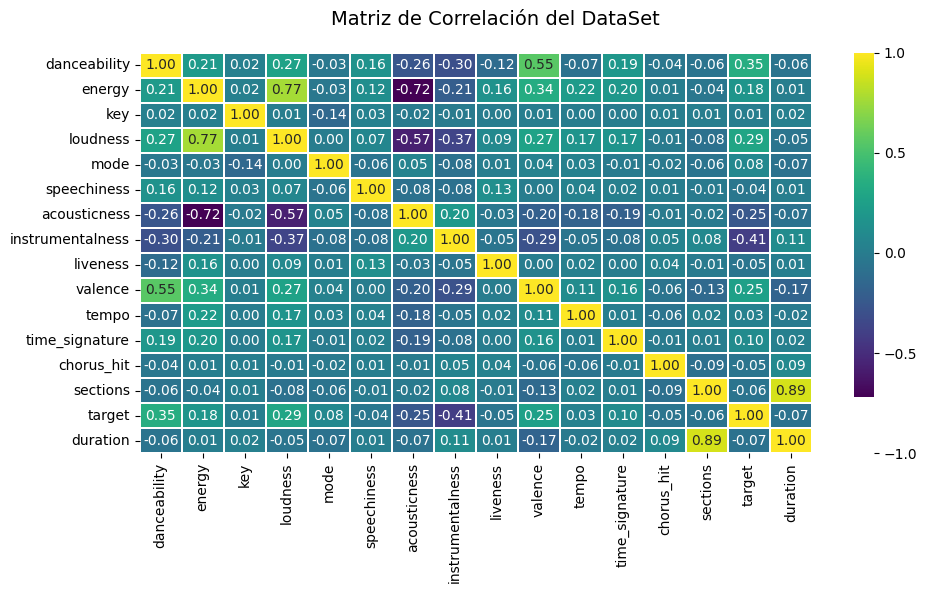

In [ ]:

f, ax = plt.subplots(figsize=(10, 6))
title = f.suptitle('Matriz de Correlación del DataSet', fontsize=14)
correlation_matrix = round(songs.corr(), 2) # Crear la matriz de correlación redondeada
heatmap = sns.heatmap(correlation_matrix, annot=True, ax=ax, cmap='viridis', fmt='.2f', linewidths=0.05) # Personalizar el mapa de calor
f.subplots_adjust(top=0.93) # Ajustar la posición del título
cbar = heatmap.collections[0].colorbar # Personalizar la barra de colores de la leyenda
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])  # Establecer los valores de las etiquetas de la barra de colores
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90) # Rotar las etiquetas de los ejes x e y
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.tight_layout() # Ajustar el espaciado entre las etiquetas de los ejes x e y
plt.show() # Mostrar el gráfico

Si consideramos como significativas las correlaciones mayores a 0.5 (correlaciones fuertes), podemos llegar a las siguientes conclusiones:

- La duración de una canción tiene una muy fuerte correlacion con la cantidad de secciones que tiene, lo que implica que canciones más largas tienden a tener más secciones.
- Existe una relación entre el nivel de ruido y la energía de una canción, donde las canciones más ruidosas tienden a ser más enérgicas.
- La característica de acústica de una canción está inversamente relacionada con su energía, lo que implica que las canciones más acústicas tienden a tener menos energía y, por lo tanto, son menos ruidosas.
- Se observa una fuerte correlación entre la valencia de una canción y su bailabilidad. La valencia se refiere a lo "positiva" o "feliz" que es una canción, lo que tiene sentido que esté relacionada con su capacidad para hacer bailar.
- Parece que las variables más fuertemente relacionadas con el éxito de una canción (representado por el target) son la instrumentalidad y, en menor medida, la bailabilidad. Canciones menos instrumentales y más bailables tienen más probabilidades de ser hits.
- En los casos de correlaciones más fuertes, como ruido con energía y duración con secciones, se podría estudiar solo una variable y asumir que su comportamiento es representativo del comportamiento de la otra variable.
- Aunque las correlaciones no superan el umbral de significancia, es importante destacar que la acústica y el volumen (loudness) tienen cierta correlación con el target.



---



### 3️⃣ Análisis de las distribuciones generales de las variables

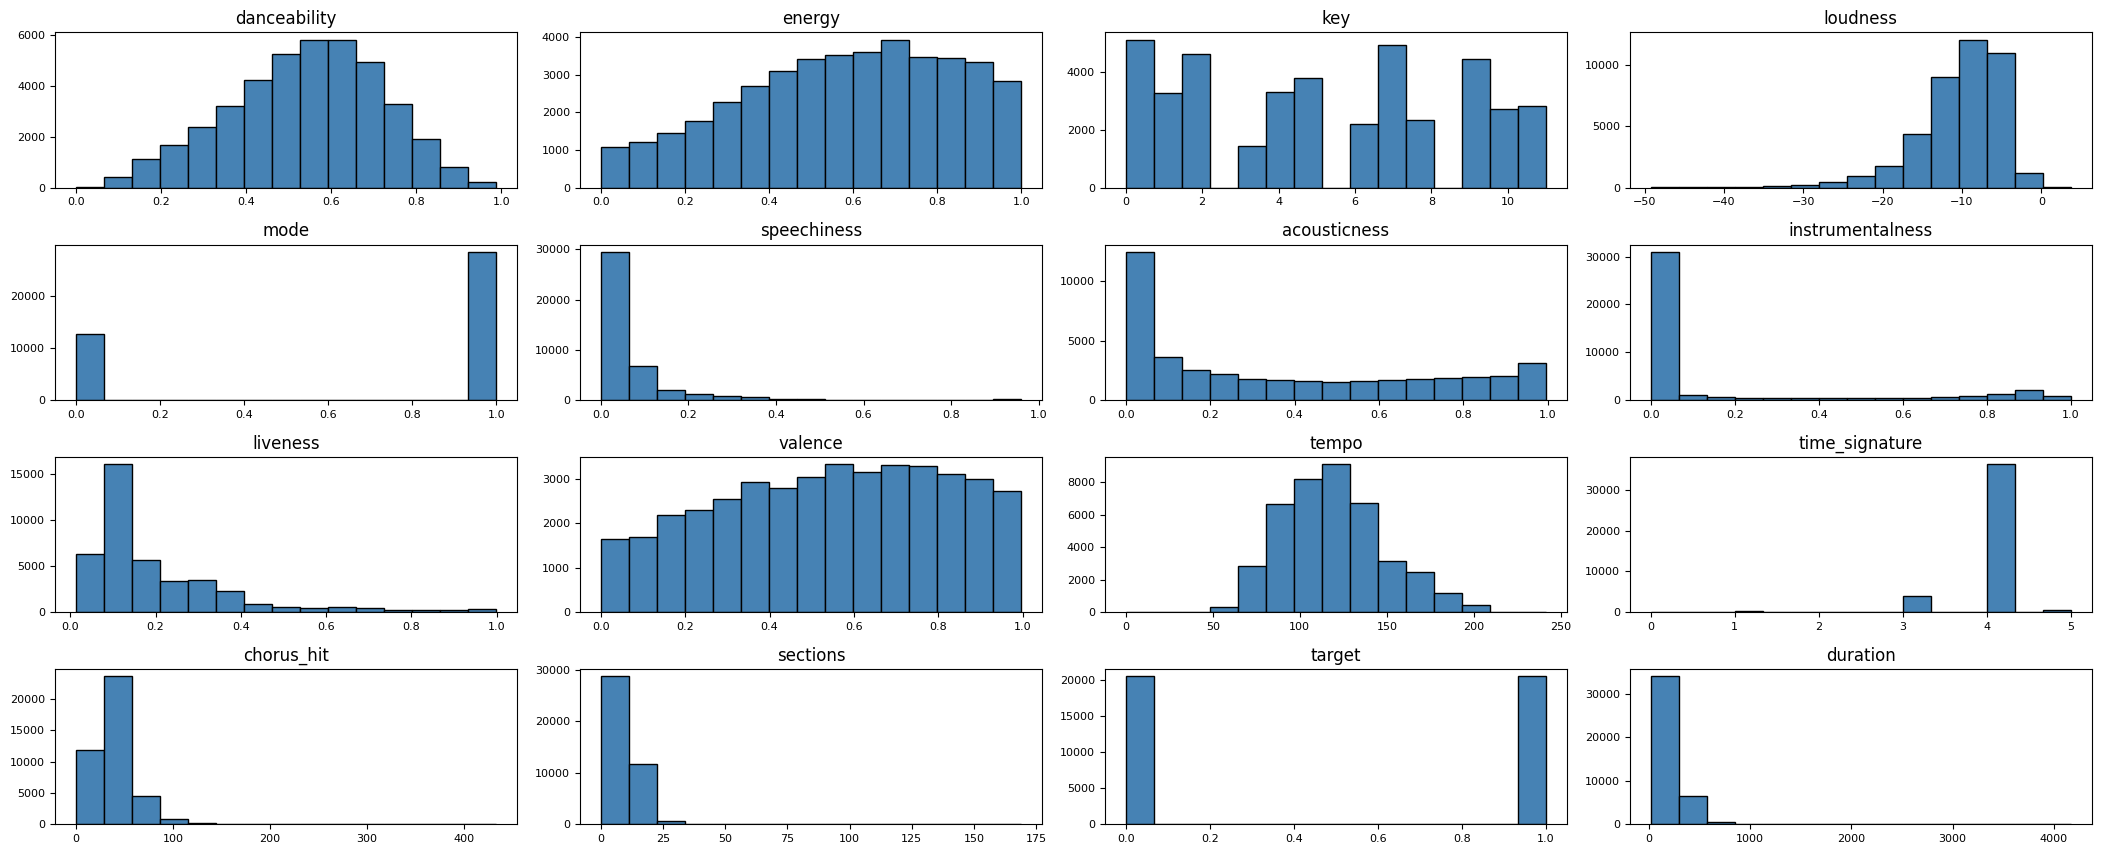

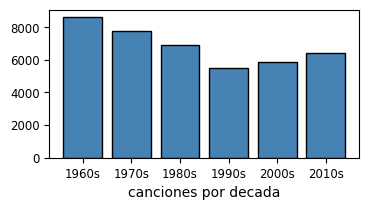

In [ ]:
# histogramas de todas las variables numericas del DataFrame (representar la distribución de una variable numérica continua)

songs[songs.columns].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 3.3, 1.8))

# gráfico de barras (representacion numerica de variable categórica)
fig = plt.figure(figsize = (4, 2))
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("canciones por decada")
w_q = songs['decade'].value_counts().sort_index()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', edgecolor='black', linewidth=1)

Al realizar el análisis de los histogramas, se evidencia que en nuestra muestra de datos para el desarrollo del modelo, el 50% de las canciones son clasificadas como "hits" (target). Sin embargo, al examinar detalladamente las características, excepto por "mode", "duration" y "time_signature", se observa que las demás características presentan una distribución más o menos uniforme alrededor de valores específicos, dependiendo del caso.

Por otro lado, al analizar el gráfico de barras que representa la producción musical por década, no se aprecian cambios significativos en la producción a lo largo del tiempo. Esto sugiere que la producción musical no ha experimentado variaciones sustanciales en relación a las décadas consideradas en nuestro conjunto de datos.



---



### 4️⃣ Analisis de Hits por decada

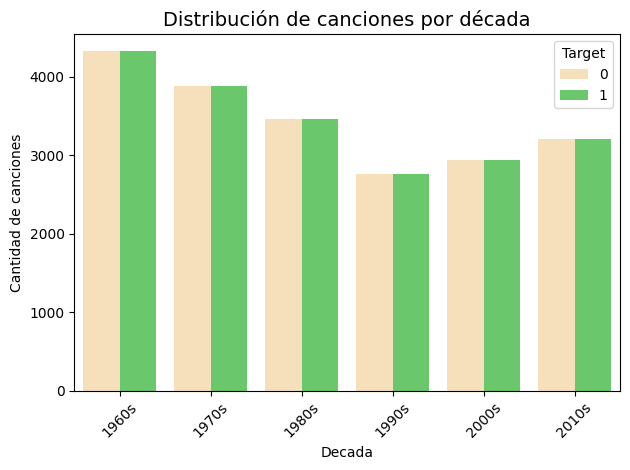

In [ ]:
#colors = ["#ffe3b1", "#5bd75b"]  # Ejemplo de colores rojo y verde
cp = sns.countplot(x="decade", hue="target", data=songs, palette={0: "#ffe3b1", 1: "#5bd75b"})
plt.title("Distribución de canciones por década", fontsize=14) # Personalizar el título
plt.xlabel("Decada") # Etiquetas de los ejes x
plt.ylabel("Cantidad de canciones") # Etiquetas de los ejes y
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x
plt.legend(title="Target", loc="upper right") # Personalizar la leyenda
plt.tight_layout() # Ajustar los márgenes del gráfico
plt.show() # Mostrar el gráfico

Al realizar el análisis de las distintas décadas, podemos destacar que la cantidad de canciones no varía significativamente entre ellas. Asimismo el porcentaje de canciones clasificadas como "hits" se mantiene constante en un 50% en todas las décadas.

Esto sugiere que la década en la que se lanza una canción no parece ser un factor determinante para su éxito, ya que el hecho de convertirse en un hit no está influenciado por la época en la que fue producida.



---



### 5️⃣ Relación entre las características y el Target

El análisis anterior, que incluyó el heatmap de correlaciones y los histogramas, proporcionó indicios sobre qué variables podrían tener un impacto más o menos significativo en el objetivo. Para examinar estas variables con más detalle, utilizaremos un pairplot:

- La selección de las variables se basó en una combinación de factores, incluyendo la presencia de correlaciones relevantes en el heatmap y una distribución que mostrara una dispersión moderada en los histogramas.
- Este enfoque nos permite explorar de manera más profunda las variables que pueden influir en el objetivo de estudio.
- Es importante utilizar múltiples técnicas de visualización y análisis para obtener una comprensión completa de los datos y las relaciones entre las variables.

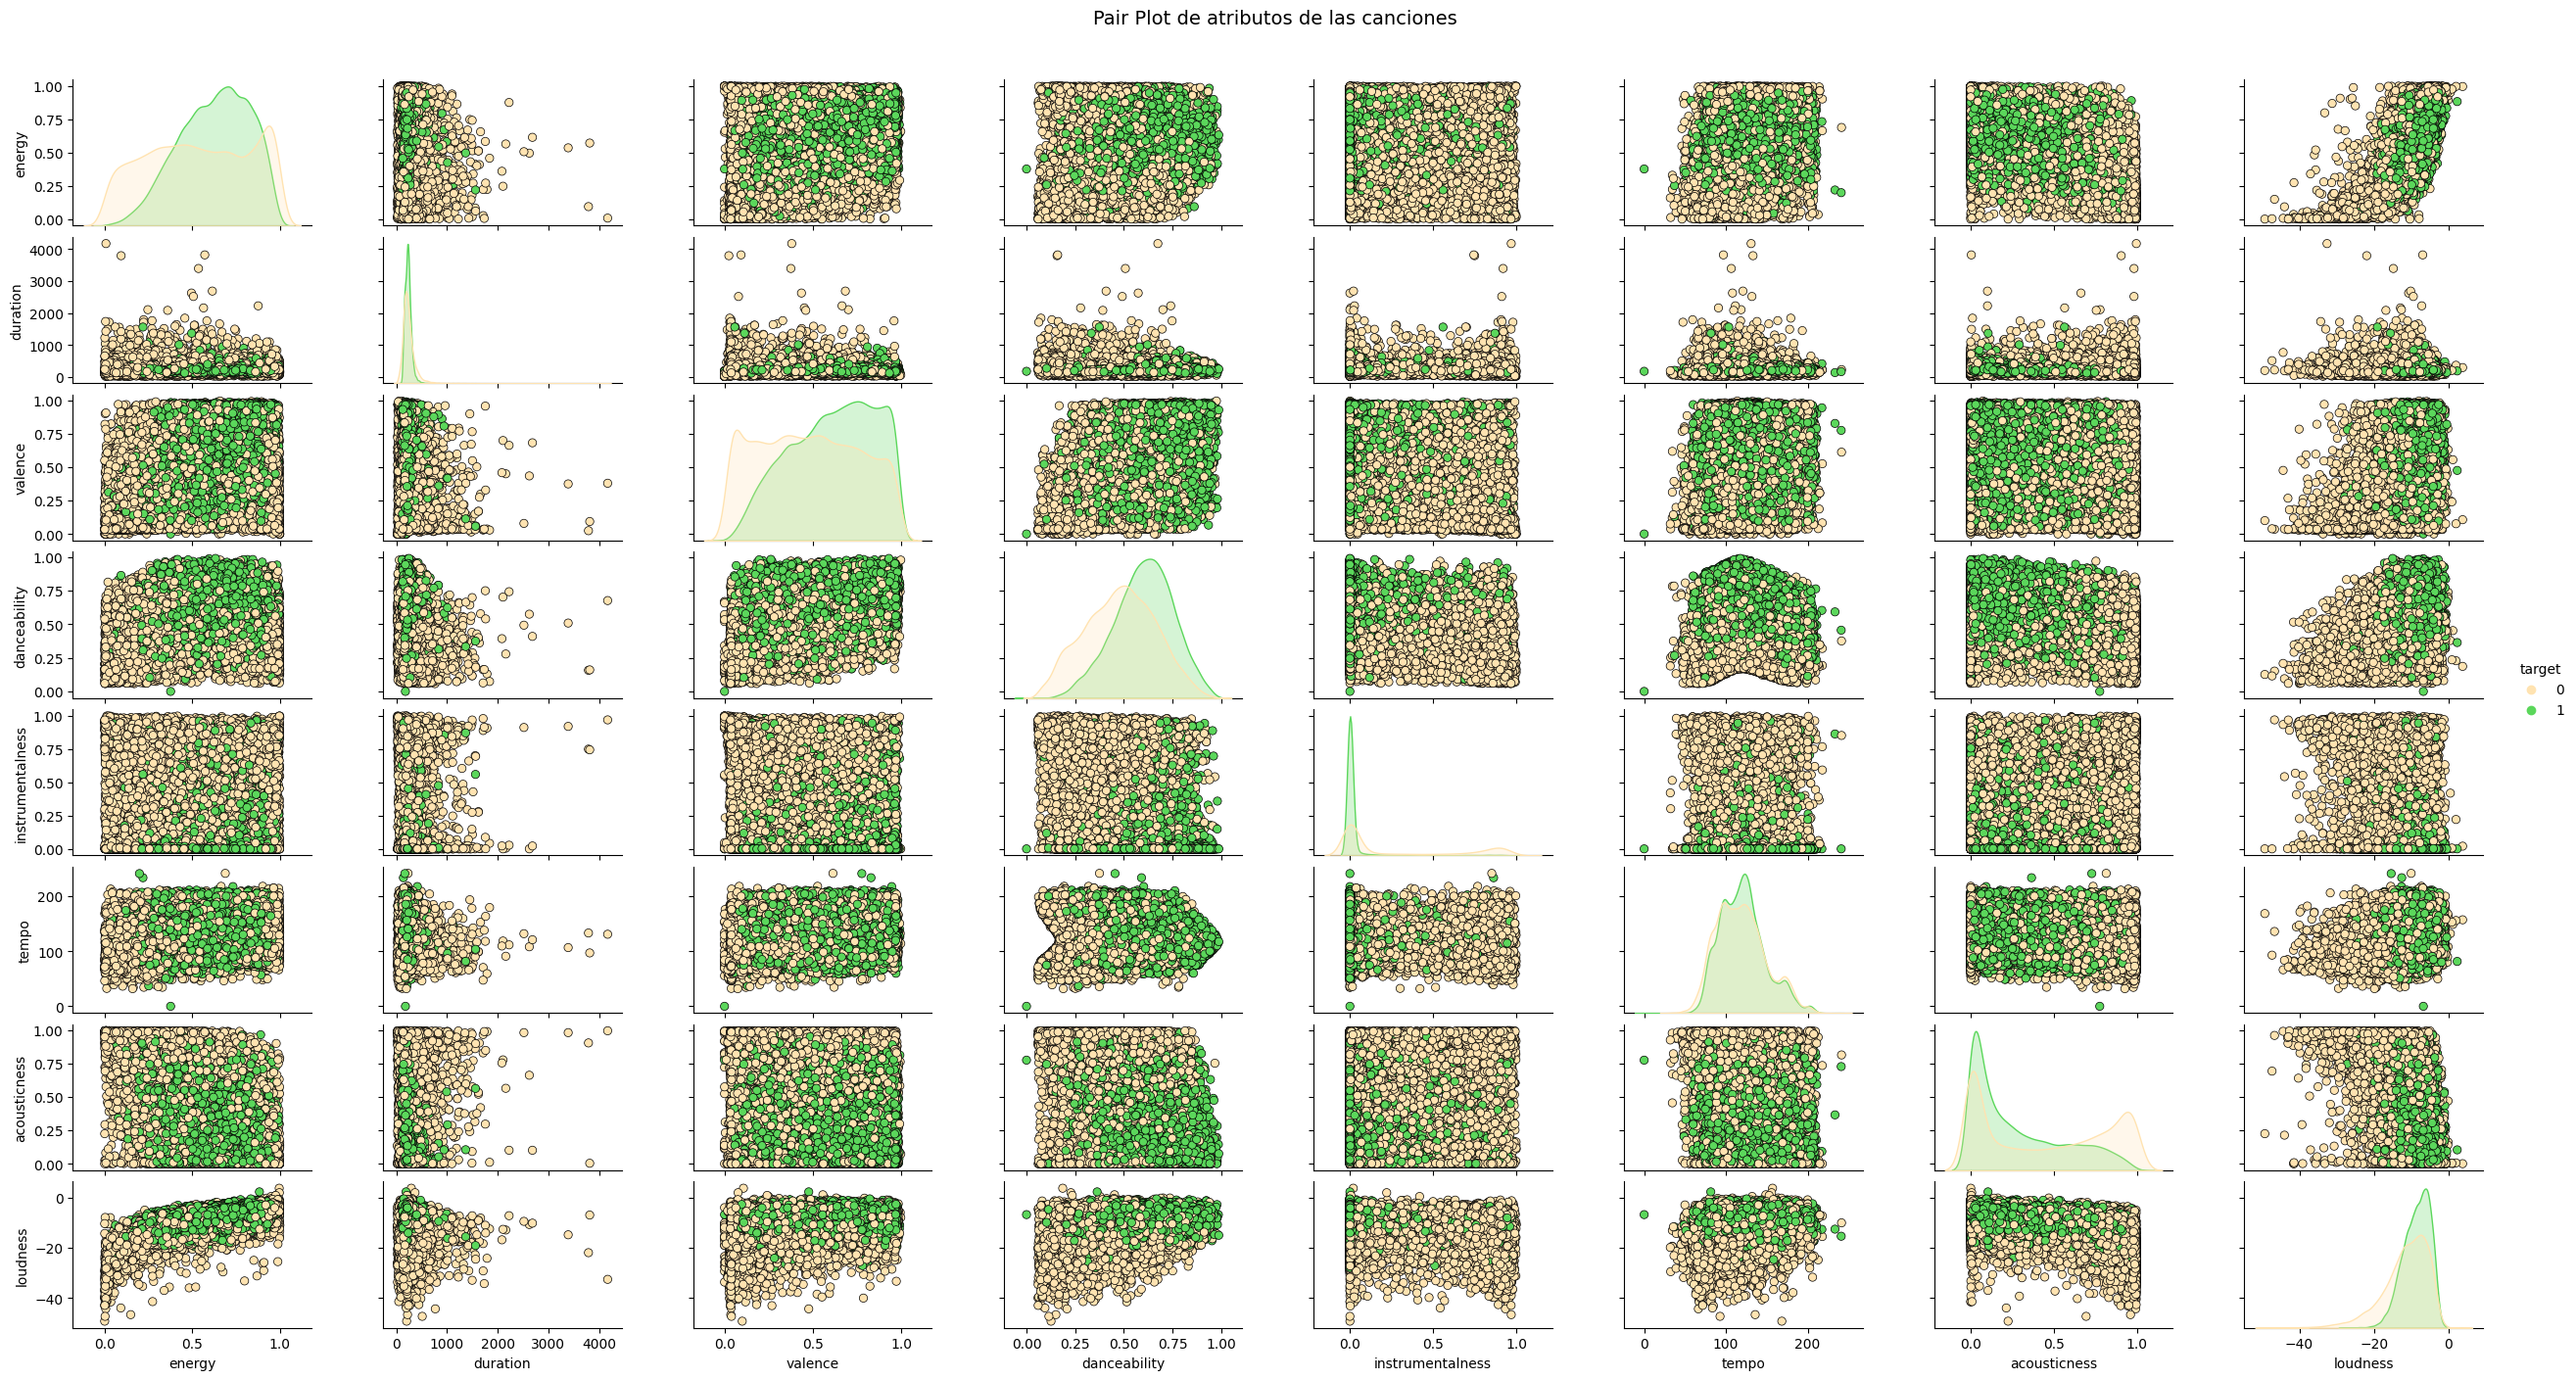

In [ ]:
pp_variables = ['energy', 'duration', 'valence', 'danceability', 'instrumentalness', 'tempo', 'acousticness', 'loudness', 'target']

pp = sns.pairplot(songs[pp_variables], hue='target', height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="black", linewidth=0.5),
                  palette={0: "#ffe3b1", 1: "#5bd75b"})

fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pair Plot de atributos de las canciones', fontsize=14)


A través del análisis realizado utilizando el pairplot, podemos llegar a las siguientes conclusiones:

- Se evidencia una correlación lineal débil entre la bailabilidad y la duración de las canciones.
- Se ratifica la relación previamente identificada en las correlaciones, donde la mayoría de los éxitos exhiben una baja instrumentalidad.
- En general, se observa que los éxitos tienden a ser más bailables y menos energéticos en comparación con las canciones que no son éxitos.
- Aunque los éxitos presentan una menor energía en comparación con las canciones que no son éxitos, se aprecia que los valores de energía de los éxitos se concentran en un rango medio-alto.
- Existe un mayor porcentaje de éxitos en valores altos de valencia, lo cual indica una mayor "positividad" o "felicidad" en estas canciones exitosas.
- Los éxitos se agrupan en un rango específico de tempo, lo que sugiere una preferencia por ciertos ritmos en las canciones exitosas.
- La relación entre el tempo y la bailabilidad exhibe una leve parábola, lo cual es coherente, ya que canciones extremadamente lentas o rápidas pueden no ser adecuadas para el baile.
- Se puede observar en el gráfico que la energía (energy) tiene una mayor influencia que la sonoridad (loudness), debido a la menor dispersión en la distribución de la energía. Estas curvas de densidad distintas proporcionan información valiosa sobre el objetivo, ya que a través de la correlación se puede estimar la sonoridad de los éxitos que se diferencian en la curva de densidad, y este valor está correlacionado con el objetivo.
- Los éxitos tienden a ser menos acústicos en comparación con las canciones que no son éxitos.
- También se aprecia una relación significativa entre la duración de las canciones y la probabilidad de ser un éxito, donde las canciones de mayor duración tienen una menor posibilidad de ser exitosas.

### 6️⃣ Tratamiento de valores nulos
En el proceso de tratamiento de valores nulos, se lleva a cabo una búsqueda de los valores nulos en el DataFrame para identificar y abordar cualquier dato faltante.

In [ ]:
print(songs.isnull().sum())

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
chorus_hit          0
sections            0
target              0
decade              0
duration            0
dtype: int64


Se confirma que no se encuentran valores nulos en ningún registro del conjunto de datos. Por lo tanto, no es necesario realizar ningún tratamiento adicional de valores nulos.

### 7️⃣ Analisis de outliers
El heatmap anterior con las correlaciones y los histogramas dieron indicios de qué variables pueden afectar mas o menos el target, por lo cual se pueden visualizar en profundidad con un pairplot dichas variables.

El criterio de selección de las variables fue una combinación entre que presentaran algún tipo de correlación relevante en el heatmap y que su distribución en el histograma no presentara demasiada dispersión.

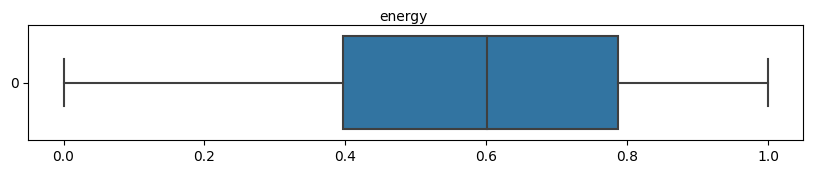

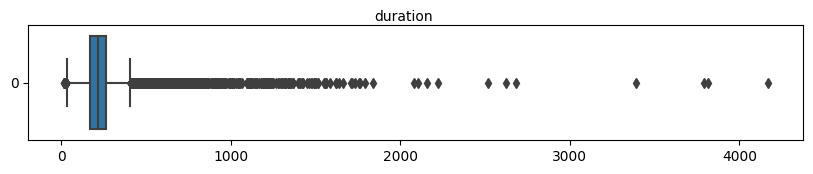

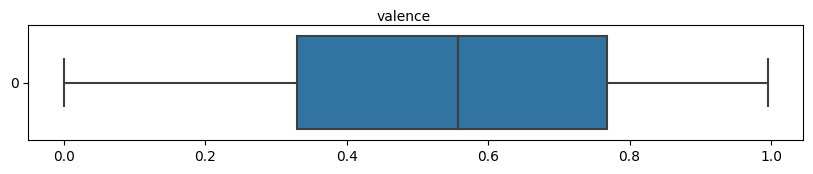

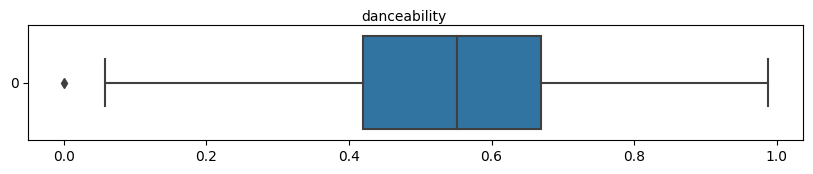

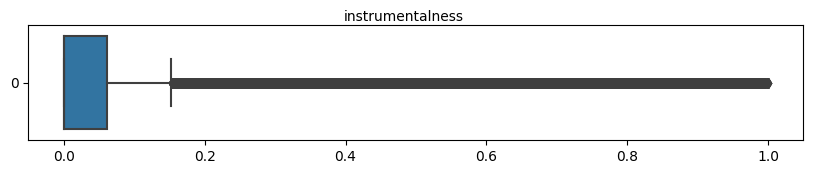

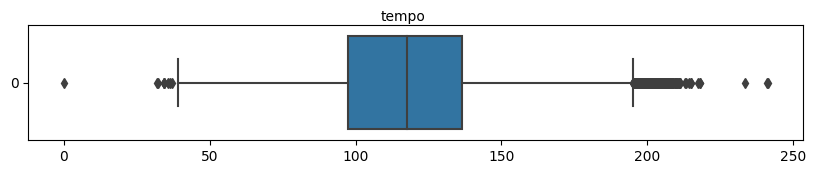

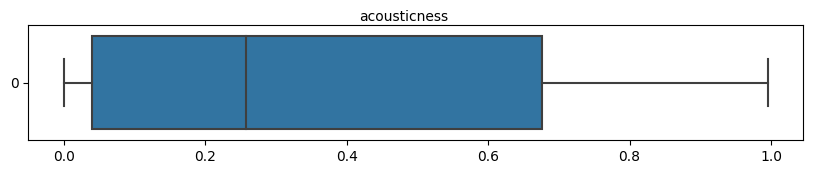

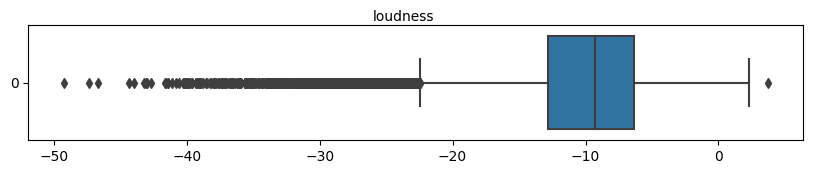

In [ ]:
# Análisis de distribución y detección de Outliers

key_features = ['energy', 'duration', 'valence', 'danceability', 'instrumentalness', 'tempo', 'acousticness', 'loudness']

def boxplot(column):
    f, (ax) = plt.subplots(1, 1, figsize=(10, 1.5))
    f.suptitle(column.name, fontsize=10)
    sns.boxplot(data=column,  ax=ax, orient='h')

for col in key_features:
    boxplot(songs[col])

En el proceso de limpieza de outliers, se lleva a cabo un acotamiento de los valores atípicos, estableciendo un límite superior o inferior según corresponda

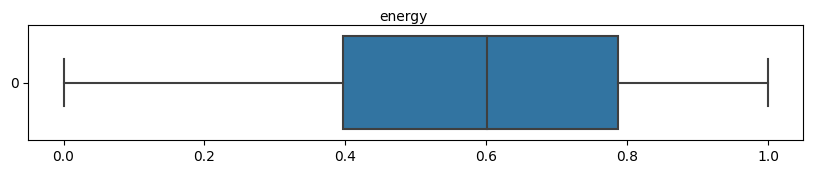

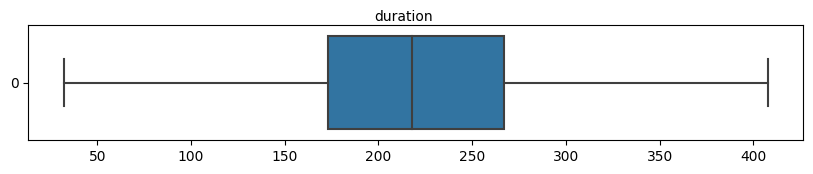

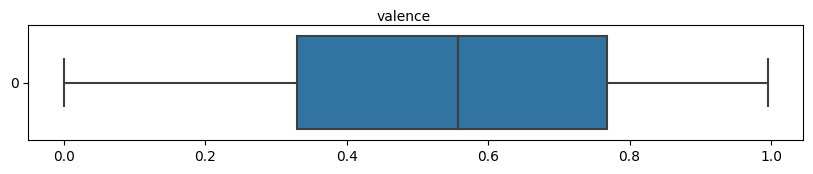

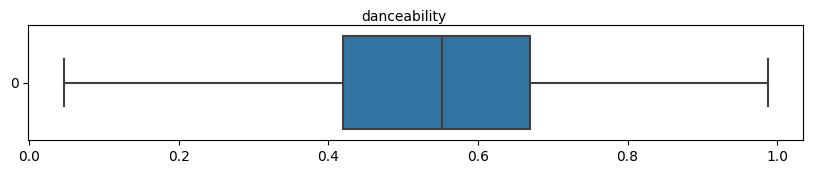

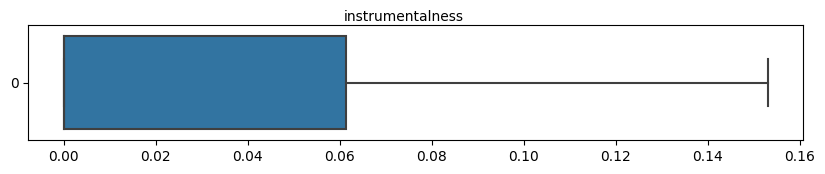

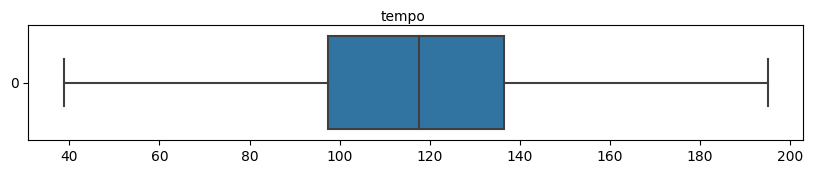

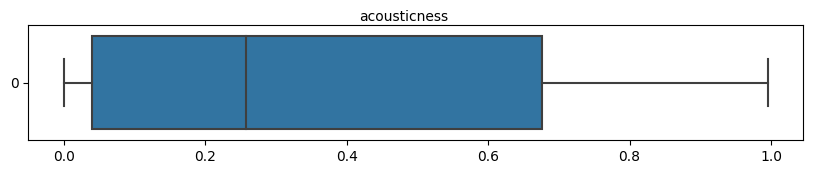

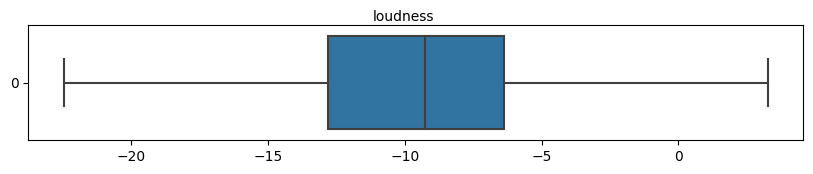

In [ ]:
# Creamos la funcion de 'normalize' para eliminar outliers que se encuentran por encima o debajo de los límites.

def normalize(column):
    q1 = np.percentile(column, 25)         # Calcula el percentil 25
    q3 = np.percentile(column, 75)         # Calcula el percentil 75
    iqr = q3 - q1                          # Calcula el rango intercuartílico
    top = q3 + 1.5 * iqr                   # Calcula los límites superior e inferior para la normalización
    bottom = q1 - 1.5 * iqr                # Aplica la normalización a cada valor de la columna
    return column.apply(lambda value: top if value > top else bottom if value < bottom else value)

# Normalizamos y graficar nuevamente
for col in key_features:
    songs[col] = normalize(songs[col])
    boxplot(songs[col])



---



### 8️⃣ Definición y prueba de baseline

Para establecer la baseline, utilizaremos las variables analizadas en el pairplot, ya que sabemos que estas variables tienen un impacto en el objetivo y que los hits en nuestra muestra no presentan una dispersión significativa en estas columnas.

El enfoque consiste en calcular la mediana de los hits para cada una de las características seleccionadas, en lugar de utilizar la media, ya que previamente determinamos que no es representativa de la muestra. Luego, para cada registro, evaluaremos si su valor en cada característica se encuentra dentro de un rango de un desvío estándar por encima o por debajo de la mediana correspondiente.

Si el registro cumple con esta condición en más de la mitad de las características seleccionadas, asumiremos que es un hit. De esta manera, asignaremos un punto a cada característica y el registro será clasificado como hit si acumula puntos en la mayoría de las características determinadas para el análisis.

In [ ]:
column_data = {} # Creación de un diccionario para almacenar los datos de columna
hits = songs[songs.target == 1] # Filtrar las canciones que son éxitos

# Iterar sobre cada columna en key_features
for col in key_features:
    # Calcular la mediana y la desviación estándar de los valores correspondientes en las canciones de éxito
    column_data[col] = (hits[col].median(), hits[col].std())

# Definir una función para determinar el baseline de un registro
def record_baseline(record, column_data):
    count = 0
    # Verificar si los valores del registro están dentro del rango aceptable definido por la mediana y la desviación estándar de cada columna
    for col in column_data.keys():
        top = column_data[col][0] + column_data[col][1]
        bottom = column_data[col][0] - column_data[col][1]
        if record[col] <= top and record[col] >= bottom:
            count += 1
    # Devolver True si la mayoría de los valores cumplen la condición, False de lo contrario
    return count > len(column_data.keys()) / 2

# Aplicar la función record_baseline a cada fila del DataFrame songs
baseline = songs.apply(lambda row: record_baseline(row, column_data), axis=1).map(lambda value: 1 if value else 0)

# Importar la función accuracy_score
from sklearn.metrics import accuracy_score

row_number = songs.shape[0] # Obtener el número de filas en el DataFrame songs
target = songs.target # Obtener la columna target del DataFrame songs
baseline_accuracy = round(accuracy_score(target, baseline), 2) # Calcular la precisión del baseline utilizando accuracy_score
print(baseline_accuracy) # Imprimir la precisión del baseline


0.68


# ✨ Checkpoint 2 - Entrega Final

Desarrollar una herramienta para Spotify (o discográfica) que permita predecir si una canción se convertirá en un éxito para decidir que conciones conviene promocionar.

# ✨ Conclusiones Finales - Good Bye!

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.